# KNN Model

KNN is a machine learning algorithm that is used for classification or regression tasks. During the training phase, the KNN algorithm simply stores the entire training dataset with their corresponding labels. During the testing phase, the KNN algorithm calculates the distance between the new input data point and each point in the training dataset. The distance can be calculated using various metrics such as Euclidean distance, Manhattan distance, etc.

KNN selects the K-nearest neighbors to the input data point, where K is a user-defined parameter.

Finally, for classification tasks, the output label for the input data point is determined by a majority vote of the labels of the K-nearest neighbors. For regression tasks, the output value is determined by a weighted average of the values of the K-nearest neighbors.

One important thing to note about KNN is that it requires that the input features are normalized or standardized. This is because the distance metric used to identify the nearest neighbors is sensitive to the scale of the input features. KNN is a simple and easy-to-understand algorithm, and it can be effective for certain types of datasets. However, it can be slow and memory-intensive for large datasets, and the choice of the value of K can be crucial for achieving good performance.

### Imports

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import pickle
import time
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split


pd.set_option('display.max_columns', None)

### Data Imports

In [13]:
with open('pickles/df.pkl', 'rb') as f:
    df = pickle.load(f)

## Creating a model

Once again our target is the cause of the fire. The input features are the same as previously, where the 'type','size' and 'unit' are dummied.

In [14]:
X = df.drop(["STAT_CAUSE_DESCR", 'STATE'] , axis='columns')
X = pd.get_dummies(columns=[ 
                            'SOURCE_SYSTEM_TYPE',
                            'FIRE_SIZE_CLASS',
                            'SOURCE_REPORTING_UNIT_NAME'
                           ], 
                   drop_first=True, data=X)

y = df['STAT_CAUSE_DESCR']

### Null Model

In [15]:
null_model = y.value_counts(normalize= True)
null_model

Lightning         0.379746
Negligence        0.260411
Infrastructure    0.188273
Arson             0.171570
Name: STAT_CAUSE_DESCR, dtype: float64

This implies that our baseline condition is 38%

In [16]:
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=2023)

### Scaling

As previously stated, it's paramount that our data is scaled before it's passed through a distance based model such as a KNN

In [17]:
sc = StandardScaler()

Z_train = sc.fit_transform(X_train)
Z_test = sc.transform(X_test)

### Initial Model

In [18]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(Z_train, y_train)
knn.score(Z_test, y_test)

0.6540892549320053

This model achieves an accuracy of 65%, which beats the baseline condition outlined above (38%)

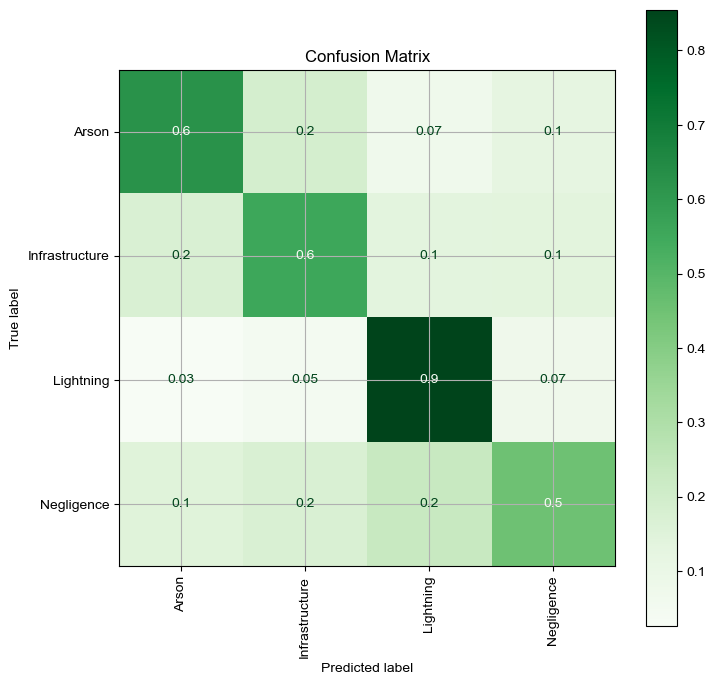

<Figure size 8000x8000 with 0 Axes>

''

In [19]:
f,ax = plt.subplots(1,1,figsize=(8,8))

cm= ConfusionMatrixDisplay.from_estimator(knn,Z_test,y_test, cmap = 'Greens',normalize= 'true', xticks_rotation='vertical', values_format='.1g', ax=ax)
plt.title("Confusion Matrix")
plt.grid(None)
plt.figure(figsize = (80,80))
sns.set(font_scale=.8)

plt.rcParams["figure.edgecolor"] = "#FAEEDA"
plt.rcParams["figure.facecolor"] = "#FAEEDA"
plt.show()
;